# Analyze sequence properties

In this tutorial a set of examples are provided to run analysis with a single or multiple sequences

Before starting, the pepfunn package can be installed as follows:

In [ ]:
!pip install git+https://github.com/novonordisk-research/pepfunn.git

Another way is to download the gihub code and running locally in the same folder: `pip install -e .`

### 1. Analysis using a single sequence

For single peptides, it is possible to calculate a set of properties and liabilities to get more information about the molecules. For this it is only required to create a Sequence object:

In [1]:
# Import module
from pepfunn.sequence import Sequence

# Create object
pep = Sequence('FNCREWCWN')

# Properties from the sequence
netCharge=pep.netCharge
avgHydro=pep.avg_hydro
isoPoint=pep.isoelectric_point

# Empirical rules
sol=pep.solubility_rules_failed
syn=pep.synthesis_rules_failed

print(f'Net charge: {netCharge}')
print(f'Average hydrophobicity: {avgHydro}') 
print(f'Isolectric point: {isoPoint}') 
print(f'Number of solubility rules failed: {sol}') 
print(f'Number of synthesis rules failed: {syn}') 

Net charge: -0.09494328883037312
Average hydrophobicity: -1.4399999999999997
Isolectric point: 5.988010597229004
Number of solubility rules failed: 1
Number of synthesis rules failed: 1


In the previous example it is possible to generate a report of what specific liabilities are found for the peptides. This is printed in the file `rules_report.txt` which can be used to understand the main issues of the sequences:

- **report_liabilities:** Flag to generate the report with the included liabilities and which ones correspond to the peptide of interest

In [3]:
pep2 = Sequence('FNCREWCWN', report_liabilities=True)
lines= [x.strip() for x in open('rules_report.txt')]
for line in lines:
    print(line)

List of failed rules identified by number. The rule ids are explained at the end of the report.
###########################################
A total of 1 solubility rules failed. The rules id(s) are: 1.
A total of 1 synthesis rules failed. The rules id(s) are: 10.
###########################################

The higher the number of rules violated, the lower the probability to be solubilized or synthesized experimentally (https://bioserv.rpbs.univ-paris-diderot.fr/services/SolyPep/).

- List of solubility rules violations:
1. Discard if the number of charged and/or of hydrophobic amino acids exceeds 45%
2. Discard if the absolute total peptide charge at pH 7 is more than +1
3. Discard if the number of glycine or proline is more than one in the sequence
4. Discard if the first or the last amino acid is charged
5. Discard if any amino acid represents more than 25% of the total sequence

- List of synthesis rules violations:
6. Discard if 2 prolines are consecutive
7. Discard if the motifs

As an input we can also use a BILN format, which will be converted to a FASTA format. For that we need to include the option `format='biln'` when the Sequence class is called. If non-natural amino acids are included, these are mapped to its closest natural analog

In [15]:
biln='N-Aib-H-F-R-Iva-L-A'

# Create object
pep = Sequence(biln, format='biln')

# Properties from the sequence
netCharge=pep.netCharge
avgHydro=pep.avg_hydro
isoPoint=pep.isoelectric_point

# Empirical rules
sol=pep.solubility_rules_failed
syn=pep.synthesis_rules_failed

print(f'Net charge: {netCharge}')
print(f'Average hydrophobicity: {avgHydro}') 
print(f'Isolectric point: {isoPoint}') 
print(f'Number of solubility rules failed: {sol}') 
print(f'Number of synthesis rules failed: {syn}')

Net charge: 1.0845832916992237
Average hydrophobicity: 0.8600000000000002
Isolectric point: 9.756532478332517
Number of solubility rules failed: 2
Number of synthesis rules failed: 1


### 2. Analysis using a library of sequences

In this example a library of peptides will be generated and a set of properties will be calculated per peptides to see the distribution of the average hydrophobicity. A random library of peptides with sizes between 10 and 20 residues will be created first using PepFuNN:

In [9]:
from pepfunn.library import Library

libtest=Library(population_size=100, mode='exploration', add_phys_chem=False, mw_neigh=4, min_pep_size=10, max_pep_size=20, verbose=False)
lib_pep=libtest.population
len(lib_pep)

100

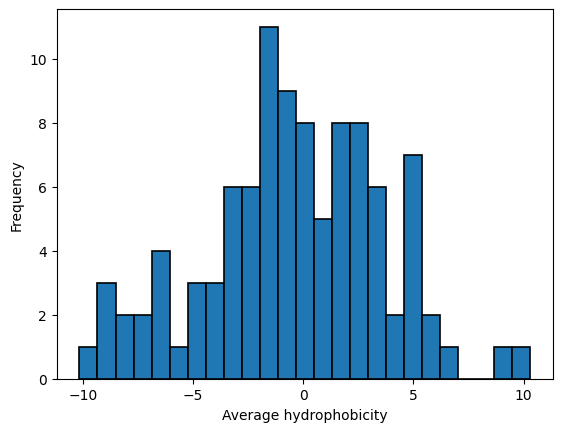

In [12]:
import matplotlib.pyplot as plt

hydro=[]
for pep in lib_pep:
    seq = Sequence(pep)
    hydro.append(seq.avg_hydro)

# Create a histogram of the lengths
plt.hist(hydro, bins=25, edgecolor='black', linewidth=1.2)
plt.xlabel('Average hydrophobicity')
plt.ylabel('Frequency')

plt.show()    

For any questions, please contact: raoc@novonordisk.com